# Estatísticas Gerais do Desafio de Filmes 2025

## 0. Imports

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

df = pd.read_csv('stats.csv')
df.head()

,Filme,Título original,País,Ano,Duração,Gênero,Dirigido por,Categoria,Assistido por,Flag
0,O Grande Hotel Budapeste,The Grand Budapest Hotel,EUA,2014,100,"Comédia, Drama",Wes Anderson,NaN,ok1na,0
1,Avatar 2 - O Caminho da Água,Avatar: The Way of Water,EUA,2022,192,"Sci-Fi, Ação, Aventura",James Cameron,8.0,EdzinhoHowlett,0
2,Túmulo dos Vagalumes,火垂るの墓,Japão,1988,89,"Guerra, Aventura",Isao Takahata,1.0,aNobree,1
3,O Peso do Talento,The Unbearable Weight of Massive Talent,EUA,2022,107,"Crime, Ação, Comédia",Tom Gormican,4.0,UmaPessoaHumana,0
4,Eu Vi o Brilho da TV,I Saw the TV Glow,EUA,2024,100,"Drama, Terror",Jane Schoenbrun,4.0,belovacomis,0


## 1. Análise de Tempo Assistido

### 1.2 Duração dos filmes

════════════════════════════════════════════════════════════
          ANÁLISE DE DURAÇÃO DOS FILMES ASSISTIDOS          
════════════════════════════════════════════════════════════

FILME MAIS LONGO:       E o Vento Levou (233 minutos)
FILME MAIS CURTO:        A Crocodile Who Lived for 100 Days (62 minutos)



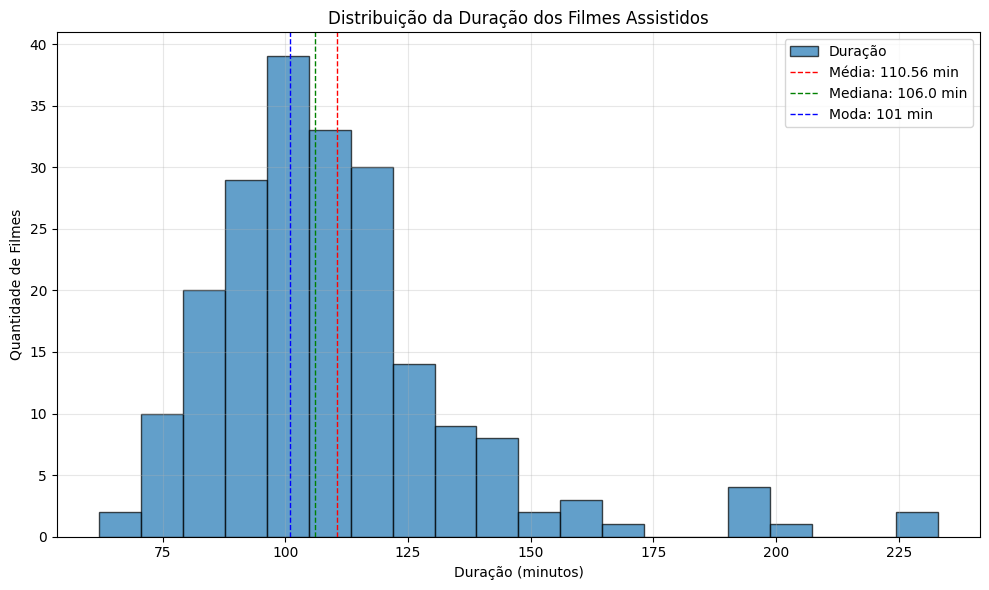

In [2]:
filme_mais_longo = df.loc[df['Duração'].idxmax()]
filme_mais_curto = df.loc[df['Duração'].idxmin()]

media_duracao = df['Duração'].mean()
mediana_duracao = df['Duração'].median()
moda_duracao = df['Duração'].mode()[0]

## Apresentação dos Resultados
print("═" * 60)
print("ANÁLISE DE DURAÇÃO DOS FILMES ASSISTIDOS".center(60))
print("═" * 60)
print(f"\nFILME MAIS LONGO:".ljust(25) + f"{filme_mais_longo['Filme']} ({filme_mais_longo['Duração']} minutos)")
print(f"FILME MAIS CURTO:".ljust(25) + f"{filme_mais_curto['Filme']} ({filme_mais_curto['Duração']} minutos)\n")

## Visualização Gráfica
plt.figure(figsize=(10, 6))
df['Duração'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
plt.axvline(media_duracao, color='red', linestyle='dashed', linewidth=1, label=f'Média: {media_duracao:.2f} min')
plt.axvline(mediana_duracao, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana_duracao} min')
plt.axvline(moda_duracao, color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {moda_duracao} min')
plt.title('Distribuição da Duração dos Filmes Assistidos')
plt.xlabel('Duração (minutos)')
plt.ylabel('Quantidade de Filmes')
plt.legend()    
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 1.2 Tempo assistido por pessoa

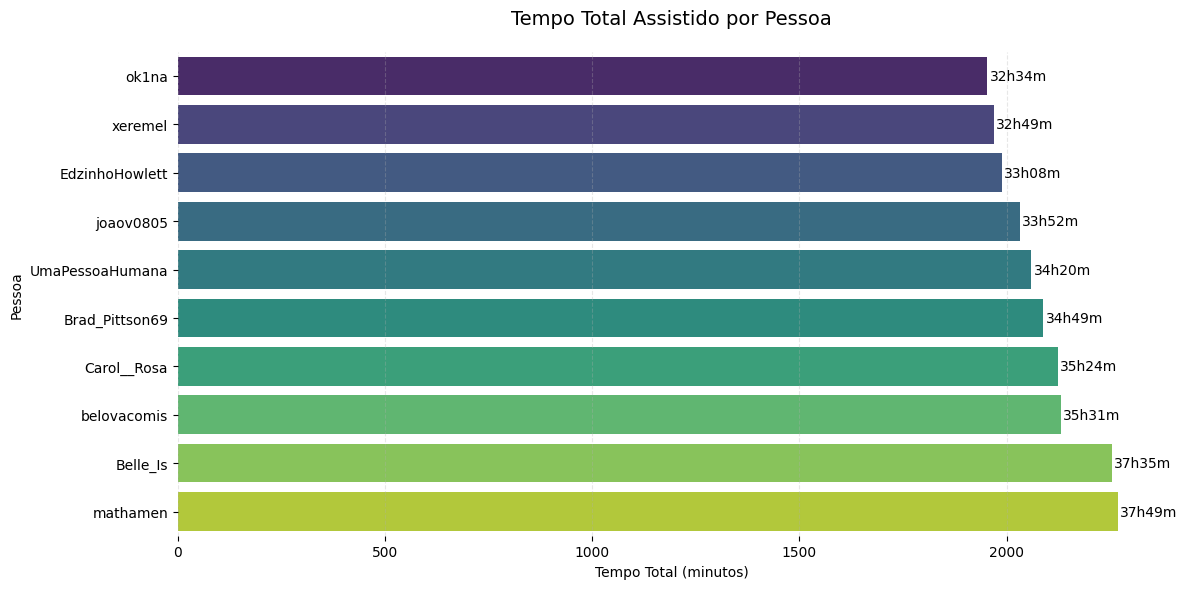

In [3]:
participantes_excluidos = ['aNobree', 'Tunim73']
df_filtrado = df[~df['Assistido por'].isin(participantes_excluidos)]

# Calcular tempo total por pessoa
tempo_total_por_pessoa = df_filtrado.groupby('Assistido por')['Duração'].sum()
tempo_total_ordenado = tempo_total_por_pessoa.sort_values(ascending=True)

# Preparar dados para o gráfico
df_plot = pd.DataFrame({
    'Pessoa': tempo_total_ordenado.index,
    'Tempo': tempo_total_ordenado.values
})

# Configurar o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_plot, 
    x='Tempo', 
    y='Pessoa', 
    hue='Pessoa', 
    palette='viridis', 
    dodge=False, 
    legend=False
)

# Adicionar valores nas barras para melhor leitura
for i, tempo in enumerate(df_plot['Tempo']):
    horas = tempo // 60
    minutos = tempo % 60
    ax.text(
        tempo + 5,  # Posição X (tempo + pequeno offset)
        i,         # Posição Y (índice da barra)
        f"{horas}h{minutos:02d}m",  # Formato HHhMMm
        va='center',
        fontsize=10
    )

# Configurações estéticas
plt.title('Tempo Total Assistido por Pessoa', pad=20, fontsize=14)
plt.xlabel('Tempo Total (minutos)')
plt.ylabel('Pessoa')
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## 2. Gêneros mais vistos

### 2.1 WordCloud dos gêneros

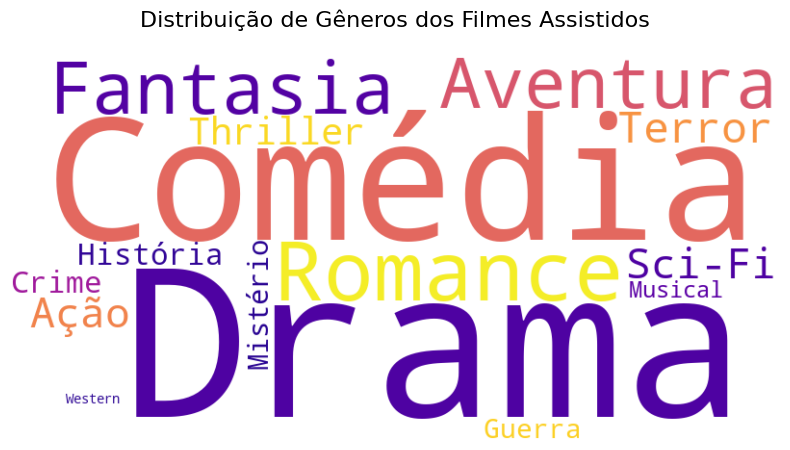

In [4]:
generos = df['Gênero'].str.split(', ').sum()

# Contamos a frequência de cada gênero
contagem_generos = Counter(generos)

# Criando a WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma',  # Pode mudar para 'plasma', 'magma', 'inferno', 'viridis', etc.
    max_words=50,
    prefer_horizontal=0.9
).generate_from_frequencies(contagem_generos)

# Configurando a visualização
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Distribuição de Gêneros dos Filmes Assistidos', pad=20, size=16)
plt.tight_layout()
plt.show()

### 2.2 Gêneros vistos por cada participante

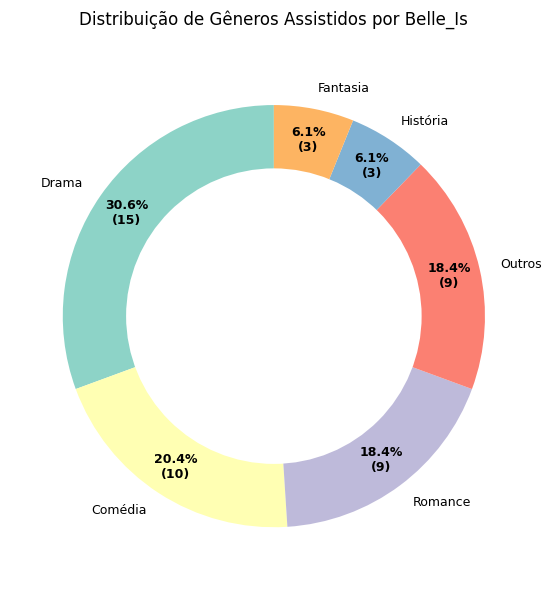


Gêneros únicos assistidos por Belle_Is:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, Guerra, História, Musical, Romance, Thriller

Contagem detalhada:
- Drama: 15 filmes
- Comédia: 10 filmes
- Romance: 9 filmes
- História: 3 filmes
- Fantasia: 3 filmes
- Aventura: 2 filmes
- Musical: 2 filmes
- Guerra: 2 filmes
- Crime: 1 filme
- Ação: 1 filme
- Thriller: 1 filme




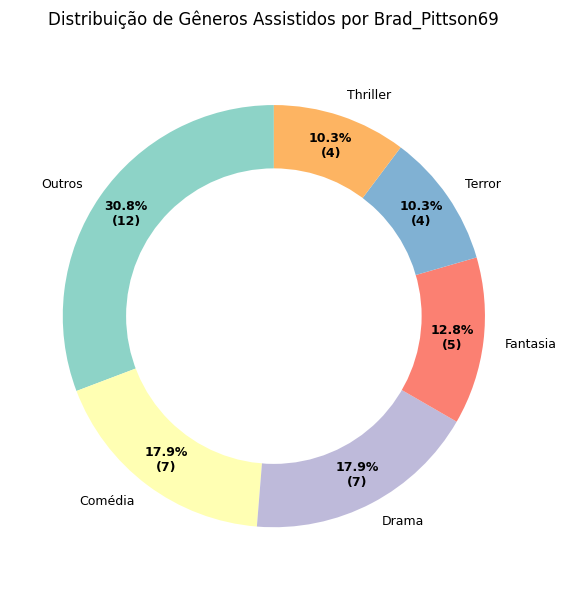


Gêneros únicos assistidos por Brad_Pittson69:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, Mistério, Musical, Romance, Sci-Fi, Terror, Thriller

Contagem detalhada:
- Comédia: 7 filmes
- Drama: 7 filmes
- Fantasia: 5 filmes
- Terror: 4 filmes
- Thriller: 4 filmes
- Romance: 3 filmes
- Crime: 3 filmes
- Ação: 2 filmes
- Aventura: 1 filme
- Musical: 1 filme
- Mistério: 1 filme
- Sci-Fi: 1 filme




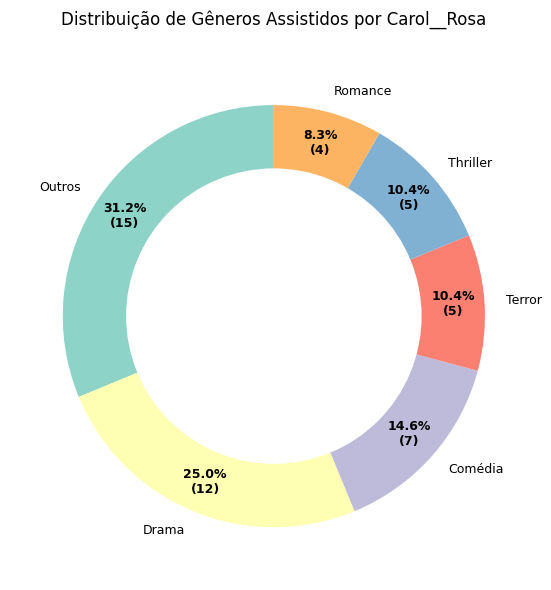


Gêneros únicos assistidos por Carol__Rosa:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, História, Mistério, Romance, Sci-Fi, Terror, Thriller

Contagem detalhada:
- Drama: 12 filmes
- Comédia: 7 filmes
- Terror: 5 filmes
- Thriller: 5 filmes
- Romance: 4 filmes
- Mistério: 3 filmes
- Fantasia: 3 filmes
- Sci-Fi: 3 filmes
- Aventura: 2 filmes
- História: 2 filmes
- Crime: 1 filme
- Ação: 1 filme




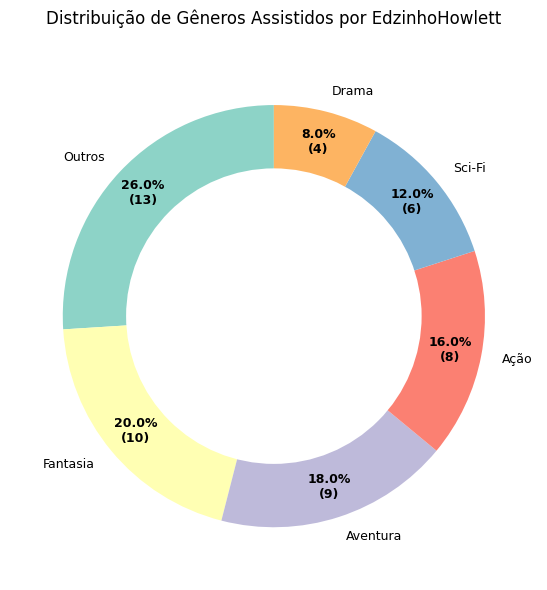


Gêneros únicos assistidos por EdzinhoHowlett:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, História, Musical, Romance, Sci-Fi, Terror

Contagem detalhada:
- Fantasia: 10 filmes
- Aventura: 9 filmes
- Ação: 8 filmes
- Sci-Fi: 6 filmes
- Drama: 4 filmes
- Romance: 4 filmes
- Comédia: 3 filmes
- Terror: 2 filmes
- Musical: 2 filmes
- Crime: 1 filme
- História: 1 filme




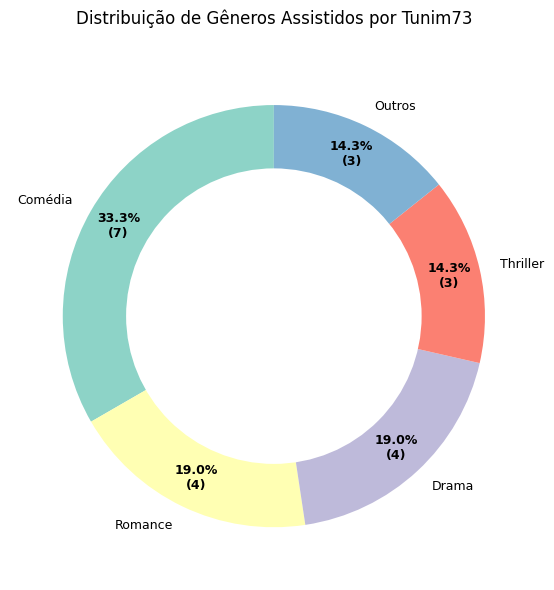


Gêneros únicos assistidos por Tunim73:
Comédia, Crime, Drama, Mistério, Romance, Terror, Thriller

Contagem detalhada:
- Comédia: 7 filmes
- Romance: 4 filmes
- Drama: 4 filmes
- Thriller: 3 filmes
- Crime: 1 filme
- Terror: 1 filme
- Mistério: 1 filme




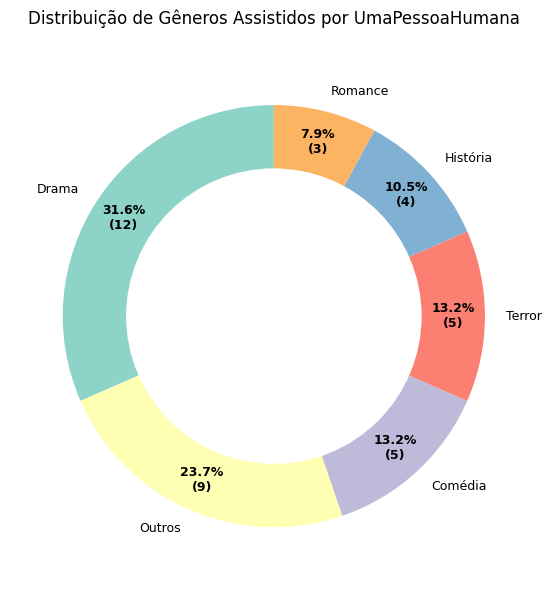


Gêneros únicos assistidos por UmaPessoaHumana:
Ação, Comédia, Crime, Drama, Guerra, História, Mistério, Romance, Sci-Fi, Terror, Thriller

Contagem detalhada:
- Drama: 12 filmes
- Comédia: 5 filmes
- Terror: 5 filmes
- História: 4 filmes
- Romance: 3 filmes
- Crime: 2 filmes
- Guerra: 2 filmes
- Thriller: 2 filmes
- Ação: 1 filme
- Mistério: 1 filme
- Sci-Fi: 1 filme




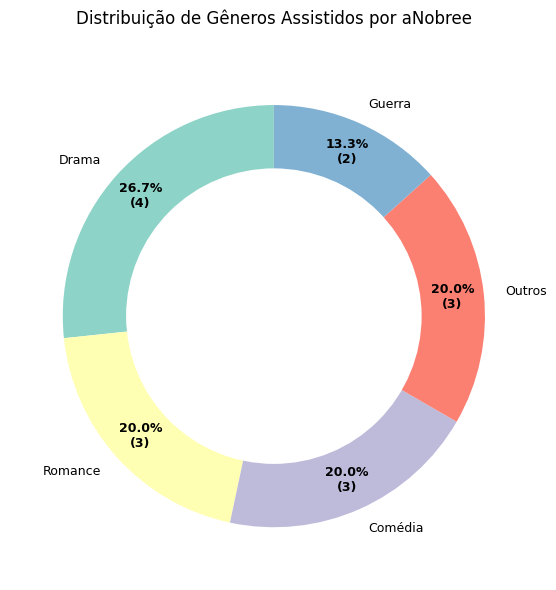


Gêneros únicos assistidos por aNobree:
Aventura, Comédia, Drama, Guerra, Romance, Sci-Fi, Terror

Contagem detalhada:
- Drama: 4 filmes
- Romance: 3 filmes
- Comédia: 3 filmes
- Guerra: 2 filmes
- Aventura: 1 filme
- Terror: 1 filme
- Sci-Fi: 1 filme




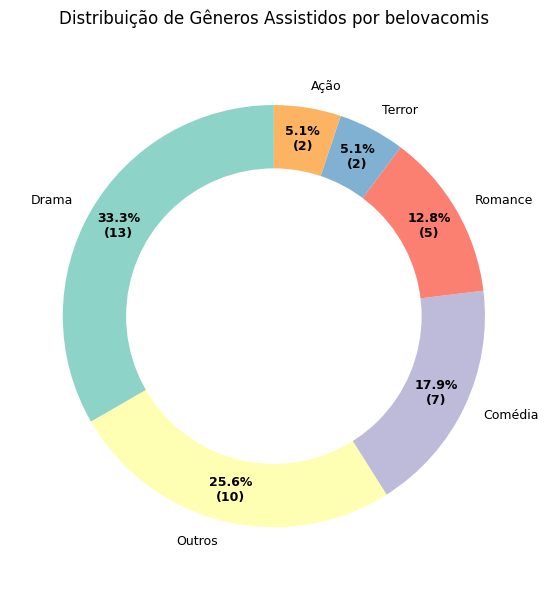


Gêneros únicos assistidos por belovacomis:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, História, Mistério, Romance, Sci-Fi, Terror, Thriller

Contagem detalhada:
- Drama: 13 filmes
- Comédia: 7 filmes
- Romance: 5 filmes
- Terror: 2 filmes
- Ação: 2 filmes
- Sci-Fi: 2 filmes
- Fantasia: 2 filmes
- História: 2 filmes
- Thriller: 1 filme
- Mistério: 1 filme
- Aventura: 1 filme
- Crime: 1 filme




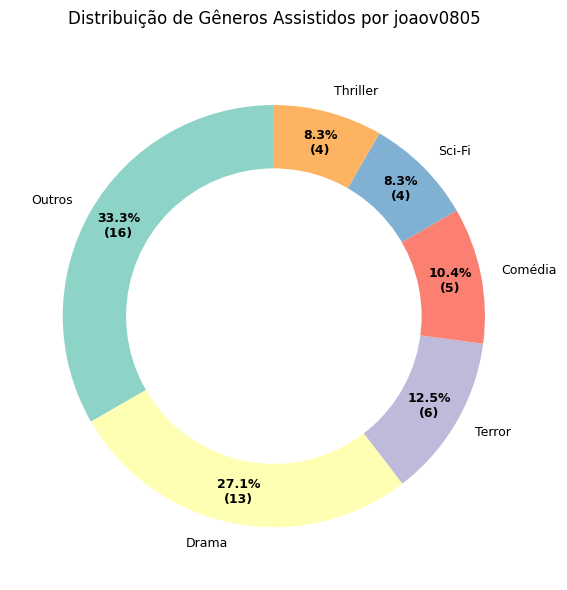


Gêneros únicos assistidos por joaov0805:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, Guerra, Mistério, Romance, Sci-Fi, Terror, Thriller, Western

Contagem detalhada:
- Drama: 13 filmes
- Terror: 6 filmes
- Comédia: 5 filmes
- Sci-Fi: 4 filmes
- Thriller: 4 filmes
- Ação: 4 filmes
- Fantasia: 3 filmes
- Romance: 2 filmes
- Crime: 2 filmes
- Aventura: 2 filmes
- Western: 1 filme
- Mistério: 1 filme
- Guerra: 1 filme




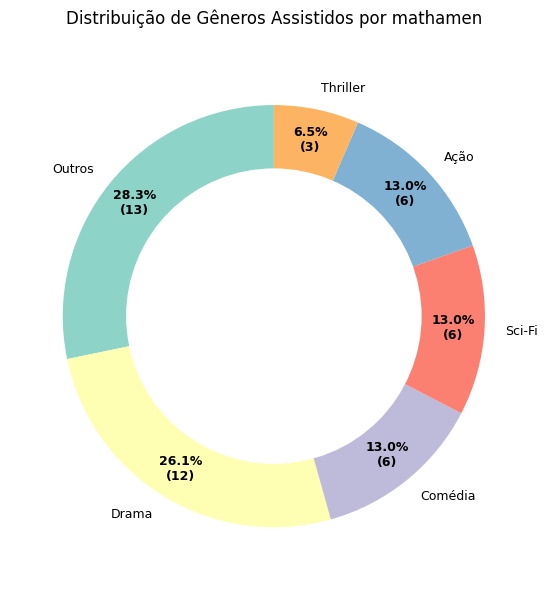


Gêneros únicos assistidos por mathamen:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, Guerra, História, Romance, Sci-Fi, Terror, Thriller

Contagem detalhada:
- Drama: 12 filmes
- Comédia: 6 filmes
- Sci-Fi: 6 filmes
- Ação: 6 filmes
- Thriller: 3 filmes
- Aventura: 3 filmes
- Fantasia: 3 filmes
- Guerra: 2 filmes
- Terror: 2 filmes
- Romance: 1 filme
- História: 1 filme
- Crime: 1 filme




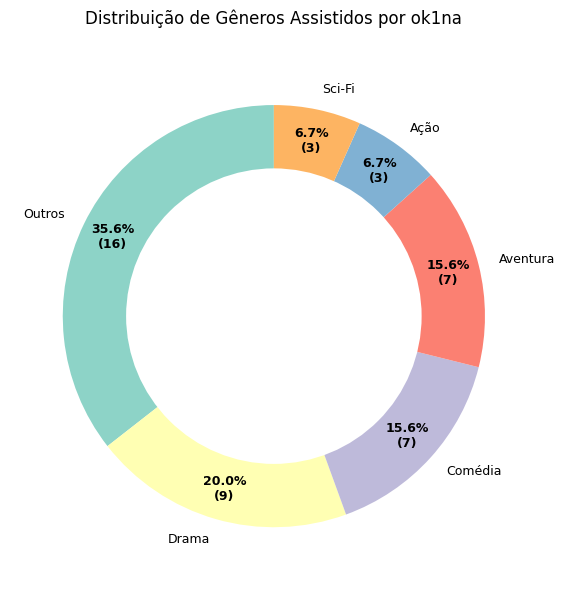


Gêneros únicos assistidos por ok1na:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, Guerra, História, Mistério, Musical, Romance, Sci-Fi, Terror, Thriller

Contagem detalhada:
- Drama: 9 filmes
- Comédia: 7 filmes
- Aventura: 7 filmes
- Ação: 3 filmes
- Sci-Fi: 3 filmes
- Terror: 3 filmes
- Fantasia: 3 filmes
- Romance: 2 filmes
- Mistério: 2 filmes
- Guerra: 2 filmes
- Crime: 1 filme
- Thriller: 1 filme
- História: 1 filme
- Musical: 1 filme




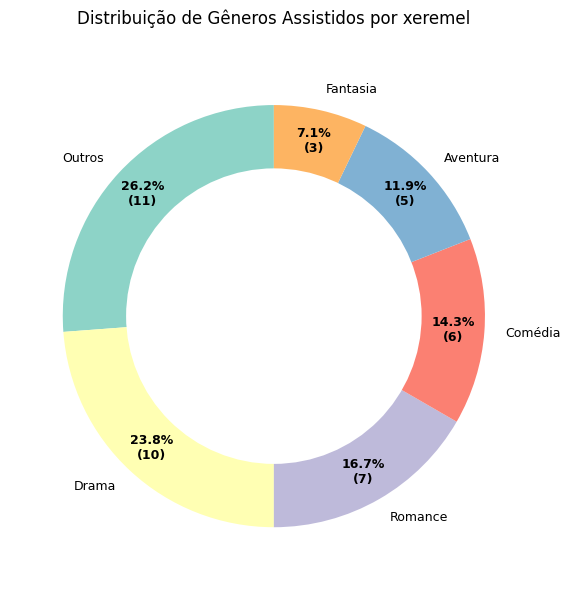


Gêneros únicos assistidos por xeremel:
Aventura, Ação, Comédia, Drama, Fantasia, Mistério, Musical, Romance, Sci-Fi, Terror

Contagem detalhada:
- Drama: 10 filmes
- Romance: 7 filmes
- Comédia: 6 filmes
- Aventura: 5 filmes
- Fantasia: 3 filmes
- Sci-Fi: 3 filmes
- Musical: 2 filmes
- Terror: 2 filmes
- Mistério: 2 filmes
- Ação: 2 filmes



=== VISÃO GERAL DE GÊNEROS ===

Total de filmes por gênero (todos participantes):
Drama: 115 filmes
Comédia: 73 filmes
Romance: 47 filmes
Fantasia: 35 filmes
Aventura: 33 filmes
Terror: 33 filmes
Sci-Fi: 30 filmes
Ação: 30 filmes
Thriller: 24 filmes
Crime: 14 filmes
História: 14 filmes
Mistério: 12 filmes
Guerra: 11 filmes
Musical: 8 filmes
Western: 1 filme

Participantes que assistiram cada gênero:
Comédia: ok1na, UmaPessoaHumana, mathamen, joaov0805, Tunim73, Belle_Is, Brad_Pittson69, belovacomis, aNobree, EdzinhoHowlett, Carol__Rosa, xeremel
Drama: ok1na, belovacomis, mathamen, joaov0805, Belle_Is, Brad_Pittson69, aNobree, Carol__Rosa, xeremel

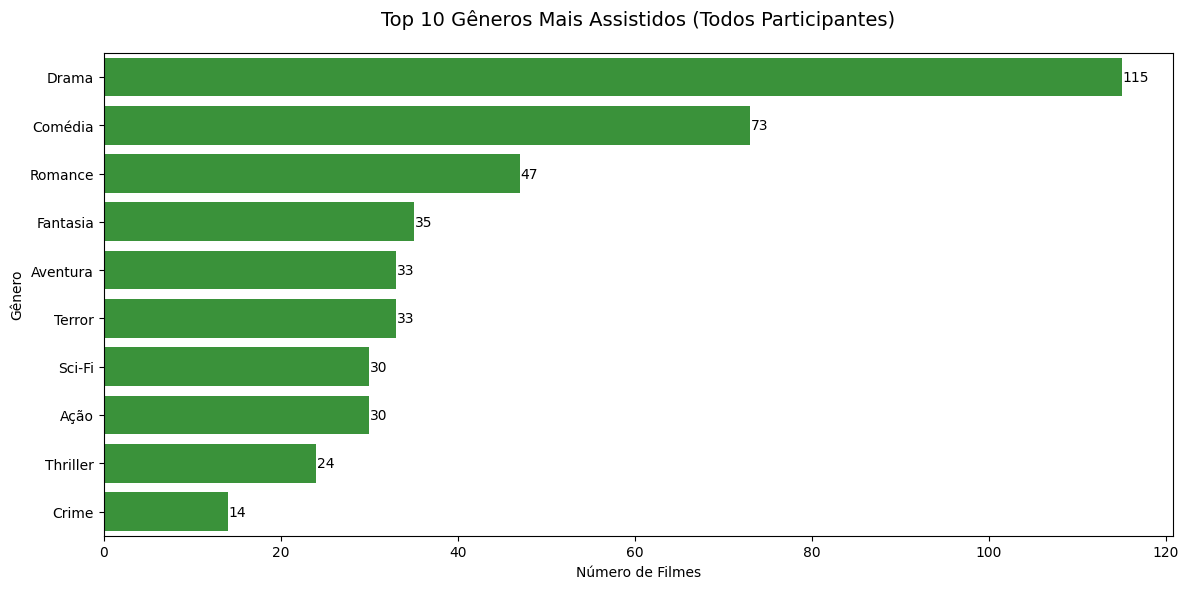

In [5]:
# Expandir gêneros (separados por vírgula) em linhas individuais
df_expandido = df.assign(Gênero=df['Gênero'].str.split(', ')).explode('Gênero')

# Agrupar por participante e contar gêneros
generos_por_participante = df_expandido.groupby('Assistido por')['Gênero'].apply(list)

## --- Função para Plotar Gráfico de Gêneros por Participante ---
def plot_generos_participante(participante, generos):
    # Contar ocorrências de cada gênero
    contagem = Counter(generos)
    generos_top = [g[0] for g in contagem.most_common(5) if g[1] > 1]  # Top 5 gêneros
    outros = [g for g in contagem if g not in generos_top]
    
    # Preparar dados para o gráfico
    dados = {}
    for g in generos_top:
        dados[g] = contagem[g]
    if outros:
        dados['Outros'] = sum(contagem[g] for g in outros)
    
    # Ordenar do maior para o menor
    dados = dict(sorted(dados.items(), key=lambda item: item[1], reverse=True))
    
    # Criar gráfico de pizza
    fig, ax = plt.subplots(figsize=(10, 6))
    wedges, texts, autotexts = ax.pie(
        dados.values(),
        labels=dados.keys(),
        autopct=lambda p: f'{p:.1f}%\n({int(round(p/100.*sum(dados.values())))})',
        startangle=90,
        colors=sns.color_palette("Set3"),
        textprops={'fontsize': 9},
        pctdistance=0.85
    )
    
    # Melhorar legibilidade
    plt.setp(autotexts, size=9, weight="bold")
    ax.set_title(f'Distribuição de Gêneros Assistidos por {participante}', 
                 pad=20, fontsize=12)
    
    # Adicionar círculo central para estilo 'donut'
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)
    
    plt.tight_layout()
    plt.show()
    
    # Listar gêneros únicos (para referência)
    print(f"\nGêneros únicos assistidos por {participante}:")
    print(", ".join(sorted(contagem.keys())))
    print(f"\nContagem detalhada:")
    for genero, qtd in contagem.most_common():
        print(f"- {genero}: {qtd} filme{'s' if qtd > 1 else ''}")
    print("\n" + "="*60 + "\n")

## --- Gerar Gráficos para Cada Participante ---
for participante, generos in generos_por_participante.items():
    plot_generos_participante(participante, generos)

## --- Visão Consolidada ---
print("\n=== VISÃO GERAL DE GÊNEROS ===")
contagem_total = Counter(df_expandido['Gênero'])
print("\nTotal de filmes por gênero (todos participantes):")
for genero, qtd in contagem_total.most_common():
    print(f"{genero}: {qtd} filme{'s' if qtd > 1 else ''}")

print("\nParticipantes que assistiram cada gênero:")
for genero in contagem_total:
    participantes = df_expandido[df_expandido['Gênero'] == genero]['Assistido por'].unique()
    print(f"{genero}: {', '.join(participantes)}")

## --- Gráfico de Gêneros Mais Populares (Todos Participantes) ---
plt.figure(figsize=(12, 6))

# Converter o Counter para DataFrame
top_10_generos = pd.DataFrame(contagem_total.most_common(10), columns=['Gênero', 'Quantidade'])

# Plotar o gráfico de barras
sns.barplot(
    data=top_10_generos,
    y='Gênero',
    x='Quantidade',
    color='#2ca02c',
    orient='h'
)

plt.title('Top 10 Gêneros Mais Assistidos (Todos Participantes)', pad=20, fontsize=14)
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')

# Adicionar os valores nas barras
for i, v in enumerate(top_10_generos['Quantidade']):
    plt.text(v + 0.1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

### 2.3 Visão Geral dos Gêneros assistidos

## 3. Distribuição de Décadas

In [6]:
filme_mais_antigo = df.loc[df['Ano'].idxmin()]
ano_mais_novo = df['Ano'].max()
filmes_mais_novos = df[df['Ano'] == ano_mais_novo]

media_ano = df['Ano'].mean()
mediana_ano = df['Ano'].median()
moda_ano = df['Ano'].mode()[0]

print(f"Filme mais antigo: {filme_mais_antigo['Filme']} ({filme_mais_antigo['Ano']})")
print(f"Filmes mais novos ({ano_mais_novo}):")
for idx, filme in filmes_mais_novos.iterrows():
    print(f"  - {filme['Filme']} ({filme['País']})")
print(f"Média dos anos: {media_ano:.2f}")
print(f"Mediana dos anos: {mediana_ano}")
print(f"Moda dos anos: {moda_ano}")

Filme mais antigo: O Inferno (1911)
Filmes mais novos (2025):
  - Guerreiras do K-Pop (EUA)
  - Quarteto Fantástico: Primeiros Passos (EUA)
  - Superman (EUA)
  - Materialistas (EUA)
  - Quarteto Fantástico: Primeiros Passos (EUA)
  - Guerreiras do K-Pop (EUA)
  - Premonição 6: Laços de Sangue (EUA)
  - Premonição 6: Laços de Sangue (EUA)
  - Quarteto Fantástico: Primeiros Passos (EUA)
  - Separados pelas Estrelas (Coreia do Sul)
  - Jurassic World: Recomeço (EUA)
  - Sorry, Baby (EUA)
  - A Hora do Mal (EUA)
  - Mickey 17 (EUA)
  - Smurfs (EUA)
  - Guerra (EUA)
  - Ne Zha 2 (China)
  - Materialistas (EUA)
Média dos anos: 2002.36
Mediana dos anos: 2011.0
Moda dos anos: 2025


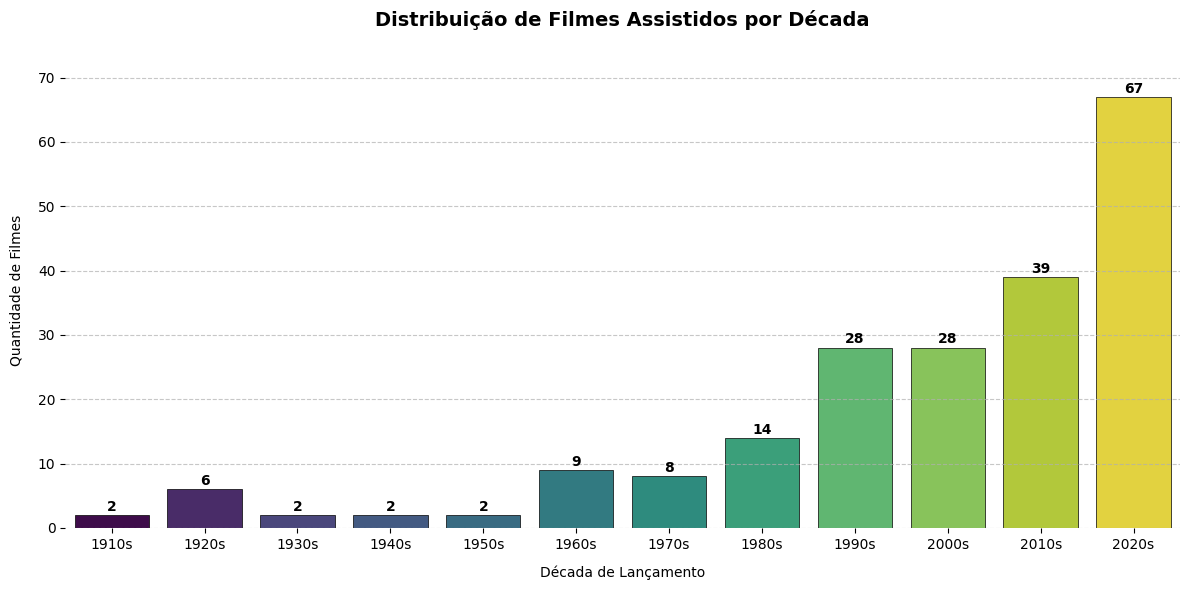

In [7]:
df['Decada'] = (df['Ano'] // 10) * 10

# Contar quantos filmes temos em cada década
filmes_por_decada = df['Decada'].value_counts().sort_index()

# Plotando o gráfico
plt.figure(figsize=(12, 6))

# Versão corrigida do barplot (resolvendo o warning da palette)
ax = sns.barplot(
    x=filmes_por_decada.index.astype(str),  # Convertendo para string para evitar confusão numérica
    y=filmes_por_decada.values,
    hue=filmes_por_decada.index,  # Adicionado para resolver o warning da palette
    palette="viridis",
    edgecolor='black',
    linewidth=0.5,
    dodge=False,  # Evita separação de barras quando usamos hue
    legend=False  # Não mostra a legenda do hue
)

# Adicionando os valores no topo de cada barra
for i, valor in enumerate(filmes_por_decada.values):
    ax.text(
        i, 
        valor + 0.2,
        f'{valor}', 
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Versão corrigida para rótulos das décadas (resolvendo o warning set_ticklabels)
decadas = [f"{int(decada)}s" for decada in filmes_por_decada.index]
ax.set_xticks(range(len(decadas)))  # Define os ticks primeiro
ax.set_xticklabels(decadas)  # Agora pode definir os labels com segurança

# Melhorando a formatação
plt.title('Distribuição de Filmes Assistidos por Década', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Década de Lançamento', labelpad=10)
plt.ylabel('Quantidade de Filmes', labelpad=10)
plt.ylim(0, filmes_por_decada.max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

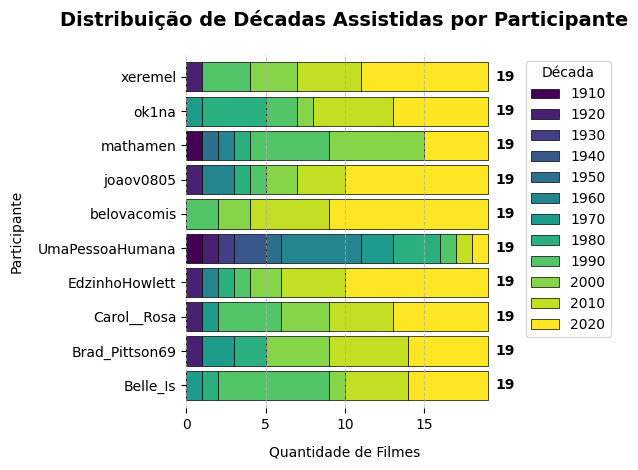


Tabela de Referência (Filmes por Década e Participante):


Década,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
Assistido por,,,,,,,,,,,,
Belle_Is,0,0,0,0,0,0,1,1,7,1,4,5
Brad_Pittson69,0,1,0,0,0,0,2,2,0,4,5,5
Carol__Rosa,0,1,0,0,0,0,1,0,4,3,4,6
EdzinhoHowlett,0,1,0,0,0,1,0,1,1,2,4,9
UmaPessoaHumana,1,1,1,2,1,5,2,3,1,0,1,1
belovacomis,0,0,0,0,0,0,0,0,2,2,5,10
joaov0805,0,1,0,0,0,2,0,1,1,2,3,9
mathamen,1,0,0,0,1,1,0,1,5,6,0,4
ok1na,0,0,0,0,0,0,1,4,2,1,5,6


In [8]:
# Filtrar participantes que não serão incluídos
participantes_excluidos = ['aNobree', 'Tunim73']
df_filtrado = df[~df['Assistido por'].isin(participantes_excluidos)].copy()  # Note o .copy()

# Criar coluna de década usando .loc
df_filtrado.loc[:, 'Década'] = (df_filtrado['Ano'] // 10) * 10

# Agrupar por participante e década
decadas_por_participante = df_filtrado.groupby(['Assistido por', 'Década']).size().unstack(fill_value=0)

# Configurar o gráfico
plt.figure(figsize=(14, 8))

# Gráfico de barras empilhadas
decadas_por_participante.plot(
    kind='barh',
    stacked=True,
    colormap='viridis',
    edgecolor='black',
    linewidth=0.5,
    width=0.85
)

# Ajustes estéticos
plt.title('Distribuição de Décadas Assistidas por Participante', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Filmes', labelpad=10)
plt.ylabel('Participante', labelpad=10)
plt.legend(title='Década', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar valores nas barras (versão simplificada)
for i, (idx, row) in enumerate(decadas_por_participante.iterrows()):
    total = row.sum()
    plt.text(total + 0.5, i, f'{total}', va='center', fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Versão em tabela para referência
print("\nTabela de Referência (Filmes por Década e Participante):")
display(decadas_por_participante.style.background_gradient(cmap='viridis', axis=1))

In [9]:
# Filtrar participantes excluídos
participantes_excluidos = ['aNobree', 'Tunim73']
df_filtrado = df[~df['Assistido por'].isin(participantes_excluidos)].copy()

# Calcular década para cada filme
df_filtrado['Década'] = (df_filtrado['Ano'] // 10) * 10

print("=" * 80)
print("ANALISE DE DECADAS PREFERIDAS E FILMES ASSISTIDOS".center(80))
print("=" * 80)

# Analisar por participante
for participante in df_filtrado['Assistido por'].unique():
    filmes = df_filtrado[df_filtrado['Assistido por'] == participante]
    total_filmes = len(filmes)
    
    # Análise por década
    contagem_decadas = filmes['Década'].value_counts()
    decada_top = contagem_decadas.idxmax()
    qtd_decada = contagem_decadas.max()
    
    # Filtrar filmes da década preferida
    filmes_decada = filmes[filmes['Década'] == decada_top].sort_values('Ano')
    
    print(f"\nPARTICIPANTE: {participante}")
    print(f"DECADA PREFERIDA: {decada_top}s ({qtd_decada} filme{'s' if qtd_decada > 1 else ''})")
    print("\nFILMES DESTA DECADA:")
    
    # Mostrar detalhes dos filmes
    for _, filme in filmes_decada.iterrows():
        print(f"- {filme['Filme']} ({filme['Ano']})")
        print(f"  Diretor: {filme['Dirigido por']}")
        print(f"  Genero: {filme['Gênero']}")
        print(f"  Duracao: {filme['Duração']} minutos\n")
    
    print("-" * 80)

               ANALISE DE DECADAS PREFERIDAS E FILMES ASSISTIDOS                

PARTICIPANTE: ok1na
DECADA PREFERIDA: 2020s (6 filmes)

FILMES DESTA DECADA:
- A Crocodile Who Lived for 100 Days (2021)
  Diretor: Miyuki Fukuda, Shinichiro Ueda 
  Genero: Drama
  Duracao: 62 minutos

- If My Favorite Pop Idol Made It to the Budokan, I Would Die: The Movie (2023)
  Diretor: Kentaro Otani
  Genero: Comédia, Drama
  Duracao: 101 minutos

- Deep Sea (2023)
  Diretor: Xiaopeng Tian
  Genero: Mistério, Fantasia, Aventura, Drama
  Duracao: 112 minutos

- Nimona (2023)
  Diretor: Nick Bruno, Troy Quane
  Genero: Fantasia, Aventura, Ação
  Duracao: 101 minutos

- Blue Period (2024)
  Diretor: Kentaro Hagiwara
  Genero: Drama, Comédia
  Duracao: 115 minutos

- Mickey 17 (2025)
  Diretor: Bong Joon Ho
  Genero: Comédia, Aventura, Sci-Fi
  Duracao: 137 minutos

--------------------------------------------------------------------------------

PARTICIPANTE: EdzinhoHowlett
DECADA PREFERIDA: 2020s (9 

## 4. Países assistidos

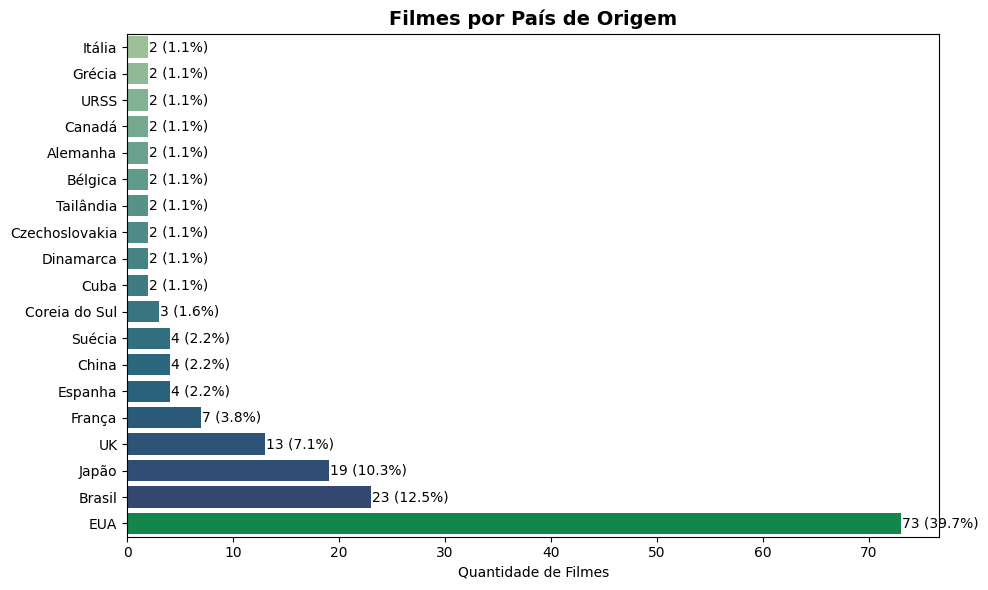

Países com apenas 1 filme:
Guiné-Bissau, Letônia, Irlanda, Hong Kong, Rússia, Chile, Geórgia, Nova Zelândia, Coreia do Norte, Argentina, Mauritânia, Polônia, Noruega, Austrália


In [10]:
# --- Preparar dados ---
df_unicos = df.drop_duplicates(subset=['Título original'])
df_paises = df_unicos.assign(País=df_unicos['País'].str.split(', '))
df_paises = df_paises.explode('País')

contagem_paises = df_paises['País'].value_counts()

# Filtrar top países
limite = 2
paises_top = contagem_paises[contagem_paises >= limite]
paises_1 = contagem_paises[contagem_paises == 1].index.tolist()

# DataFrame para plot
df_paises_plot = paises_top.reset_index()
df_paises_plot.columns = ['País', 'Quantidade']
df_paises_plot = df_paises_plot.sort_values('Quantidade', ascending=True)

# Paleta de cores (verde no mais frequente)
cores = sns.color_palette("crest", n_colors=len(df_paises_plot))
cores[-1] = (0.0, 0.6, 0.3)

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_paises_plot,
    x='Quantidade',
    y='País',
    hue='País',
    palette=cores,
    dodge=False,
    legend=False
)

# Rótulos com valores e %
total_filmes = contagem_paises.sum()
for index, value in enumerate(df_paises_plot['Quantidade']):
    plt.text(value + 0.1, index, f"{value} ({value/total_filmes:.1%})", va='center')

plt.title('Filmes por País de Origem', fontsize=14, weight='bold')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('')
plt.tight_layout()
plt.show()

# --- Imprimir países com apenas 1 filme ---
if paises_1:
    print("Países com apenas 1 filme:")
    print(", ".join(paises_1))


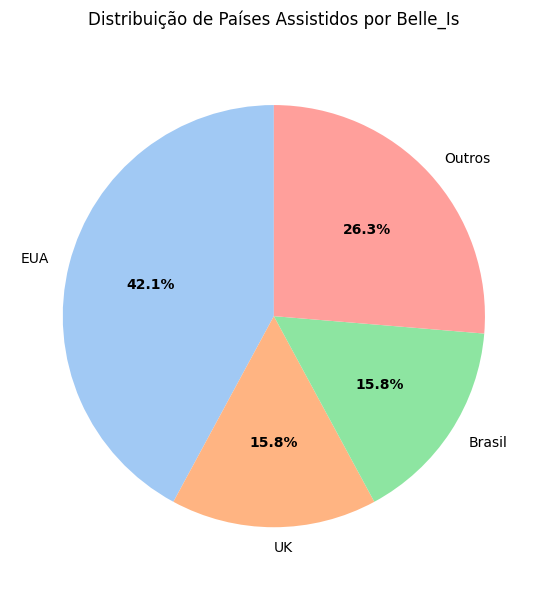


Países assistidos por Belle_Is:
Brasil, Dinamarca, EUA, França, Itália, Japão, Noruega, UK




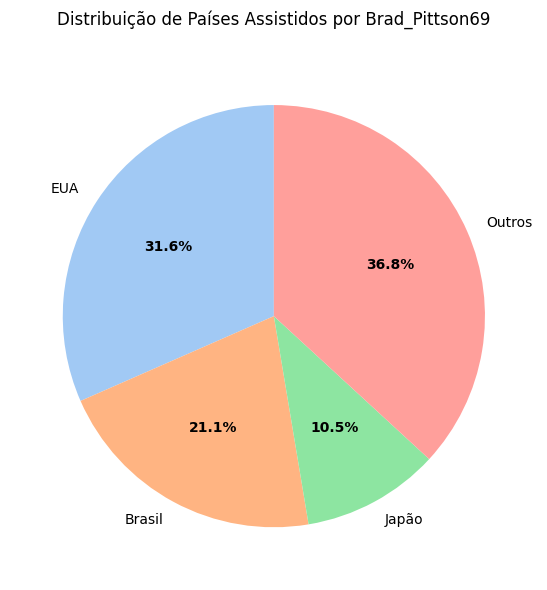


Países assistidos por Brad_Pittson69:
Alemanha, Argentina, Brasil, EUA, Espanha, França, Grécia, Japão, Polônia, UK




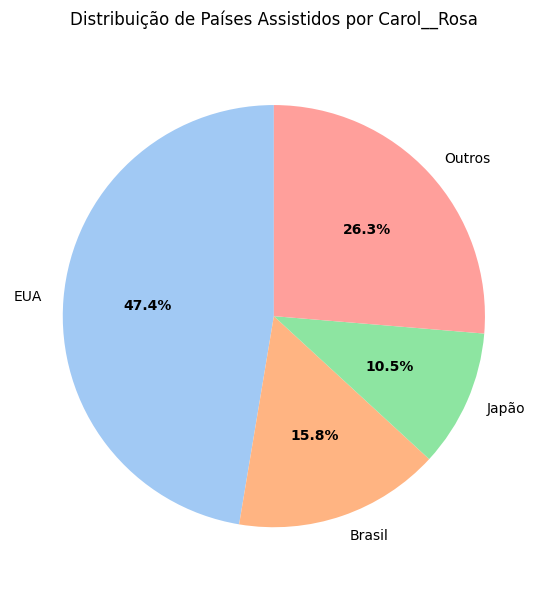


Países assistidos por Carol__Rosa:
Alemanha, Brasil, EUA, Espanha, França, Itália, Japão, UK




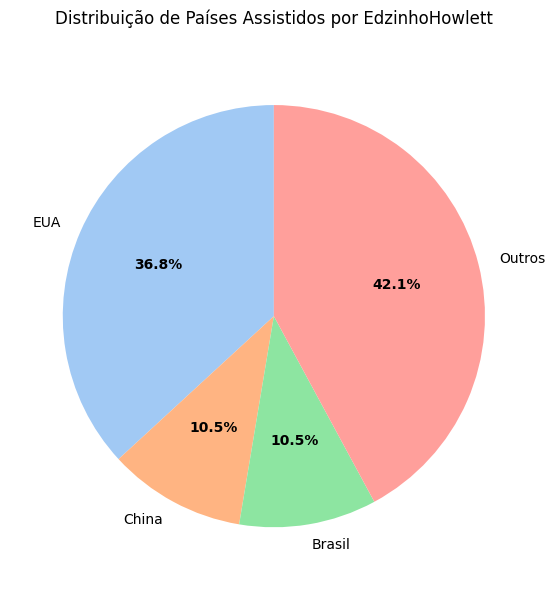


Países assistidos por EdzinhoHowlett:
Alemanha, Brasil, China, EUA, França, Irlanda, Japão, Letônia, Rússia, UK, URSS




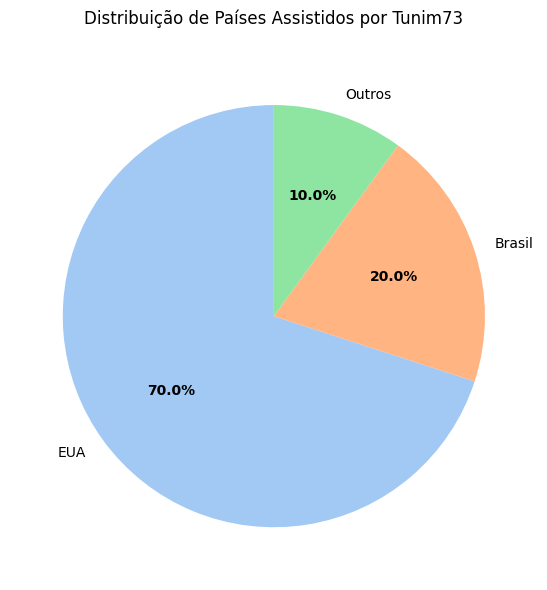


Países assistidos por Tunim73:
Brasil, EUA, UK




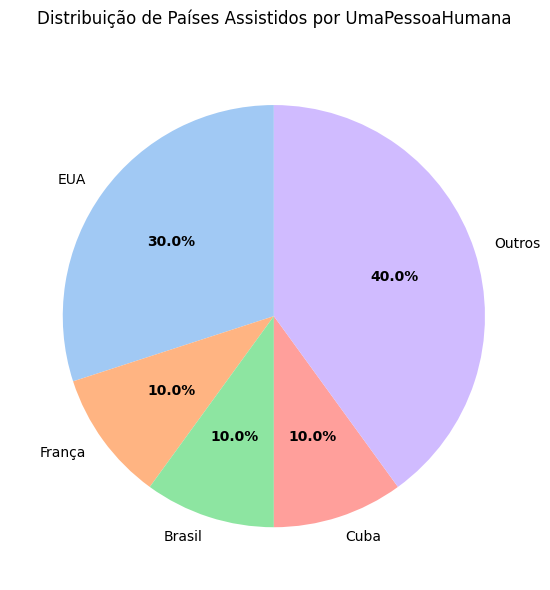


Países assistidos por UmaPessoaHumana:
Austrália, Brasil, Canadá, Cuba, Dinamarca, EUA, França, Guiné-Bissau, Japão, Mauritânia, Suécia, URSS




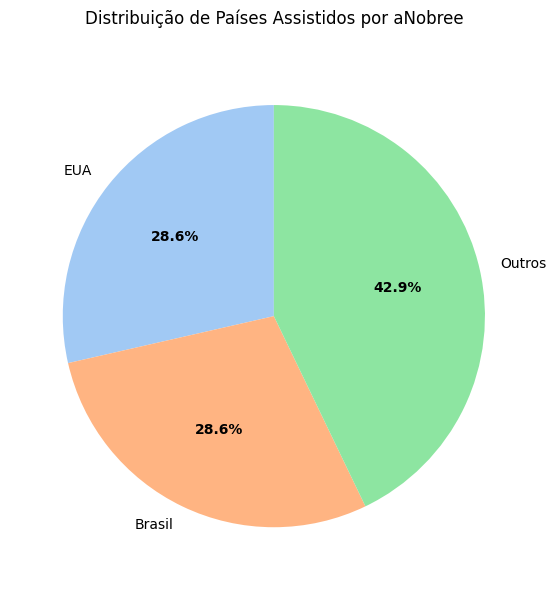


Países assistidos por aNobree:
Brasil, EUA, Itália, Japão, UK




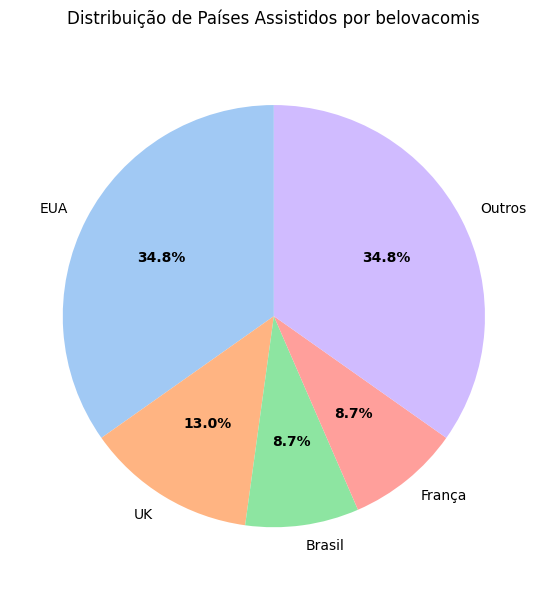


Países assistidos por belovacomis:
Brasil, Canadá, Coreia do Sul, EUA, Espanha, França, Geórgia, Japão, Suécia, Tailândia, UK




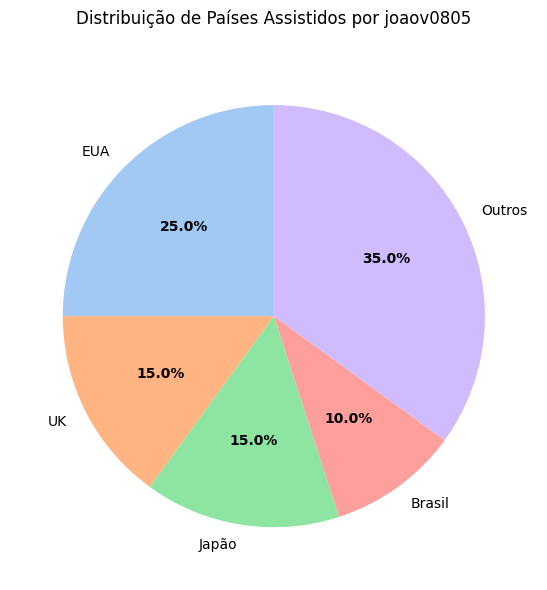


Países assistidos por joaov0805:
Brasil, Bélgica, Chile, Czechoslovakia, Dinamarca, EUA, Grécia, Japão, Suécia, Tailândia, UK




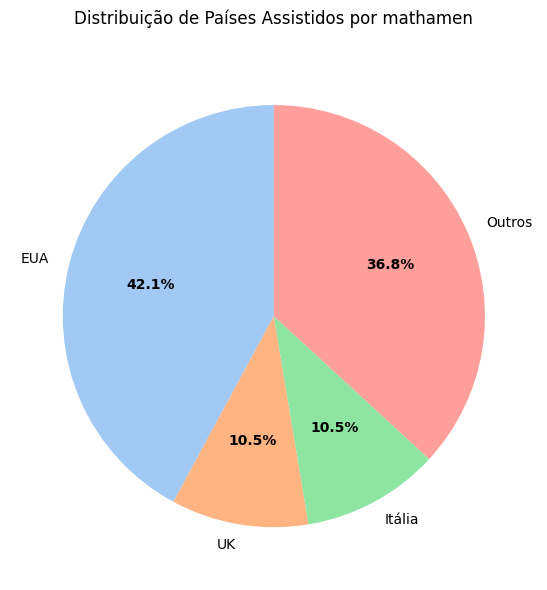


Países assistidos por mathamen:
Alemanha, Brasil, China, Czechoslovakia, EUA, França, Itália, Japão, Suécia, UK




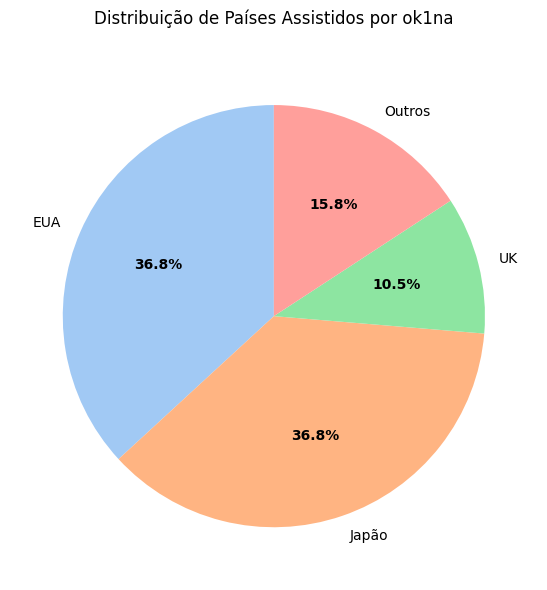


Países assistidos por ok1na:
China, Coreia do Norte, EUA, França, Japão, UK




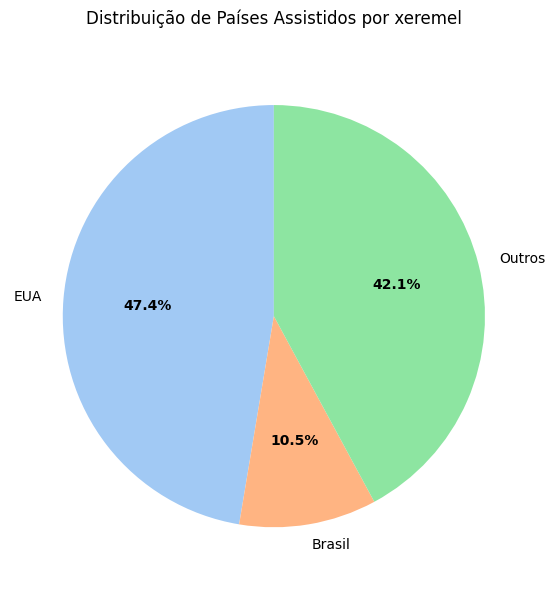


Países assistidos por xeremel:
Brasil, Bélgica, Coreia do Sul, EUA, Espanha, França, Hong Kong, Letônia, Nova Zelândia, UK



=== VISÃO CONSOLIDADA ===

Total de filmes por país (todos participantes):
EUA: 82 filmes
Brasil: 25 filmes
Japão: 20 filmes
UK: 19 filmes
França: 11 filmes
Itália: 5 filmes
Alemanha: 4 filmes
Espanha: 4 filmes
China: 4 filmes
Suécia: 4 filmes
Coreia do Sul: 3 filmes
Dinamarca: 3 filmes
Czechoslovakia: 2 filmes
Grécia: 2 filmes
Letônia: 2 filmes
Bélgica: 2 filmes
Tailândia: 2 filmes
Canadá: 2 filmes
URSS: 2 filmes
Cuba: 2 filmes
Guiné-Bissau: 1 filme
Hong Kong: 1 filme
Irlanda: 1 filme
Chile: 1 filme
Coreia do Norte: 1 filme
Rússia: 1 filme
Nova Zelândia: 1 filme
Geórgia: 1 filme
Argentina: 1 filme
Mauritânia: 1 filme
Polônia: 1 filme
Noruega: 1 filme
Austrália: 1 filme

Participantes que assistiram filmes de cada país:
EUA: ok1na, EdzinhoHowlett, UmaPessoaHumana, belovacomis, Tunim73, Carol__Rosa, Belle_Is, aNobree, Brad_Pittson69, mathamen, xeremel, joaov0805

In [11]:
# Criar DataFrame expandido por país
df_expandido = df.assign(País=df['País'].str.split(', ')).explode('País')

# Agrupar por participante e contar países
paises_por_participante = df_expandido.groupby('Assistido por')['País'].apply(list)

## Função para plotar gráfico de pizza por participante
def plot_paises_participante(participante, paises):
    # Contar ocorrências de cada país
    contagem = Counter(paises)
    paises_top = [p[0] for p in contagem.most_common(4) if p[1] > 1]
    outros = [p for p in contagem if p not in paises_top]
    
    # Preparar dados para o gráfico
    dados = {}
    for p in paises_top:
        dados[p] = contagem[p]
    if outros:
        dados['Outros'] = sum(contagem[p] for p in outros)
    
    # Criar gráfico
    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(
        dados.values(),
        labels=dados.keys(),
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("pastel"),
        textprops={'fontsize': 10}
    )
    
    # Melhorar legibilidade
    plt.setp(autotexts, size=10, weight="bold")
    ax.set_title(f'Distribuição de Países Assistidos por {participante}', 
                 pad=20, fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Listar países únicos (para referência)
    print(f"\nPaíses assistidos por {participante}:")
    print(", ".join(sorted(contagem.keys())))

## Gerar gráficos para cada participante
for participante, paises in paises_por_participante.items():
    plot_paises_participante(participante, paises)
    print("\n" + "="*60 + "\n")

## Versão consolidada (todos participantes juntos)
print("\n=== VISÃO CONSOLIDADA ===")
contagem_total = Counter(df_expandido['País'])
print("\nTotal de filmes por país (todos participantes):")
for pais, qtd in contagem_total.most_common():
    print(f"{pais}: {qtd} filme{'s' if qtd > 1 else ''}")

print("\nParticipantes que assistiram filmes de cada país:")
for pais in contagem_total:
    participantes = df_expandido[df_expandido['País'] == pais]['Assistido por'].unique()
    print(f"{pais}: {', '.join(participantes)}")

## 5. Proporção de Animações

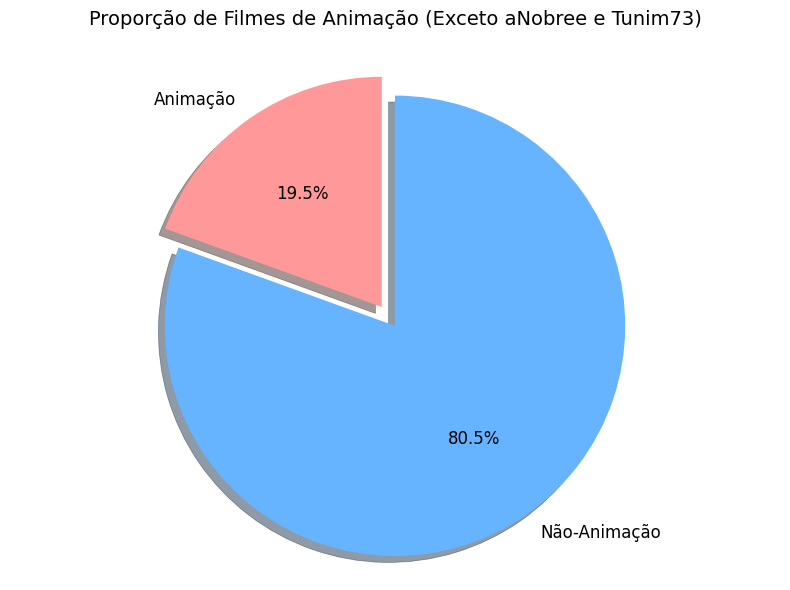

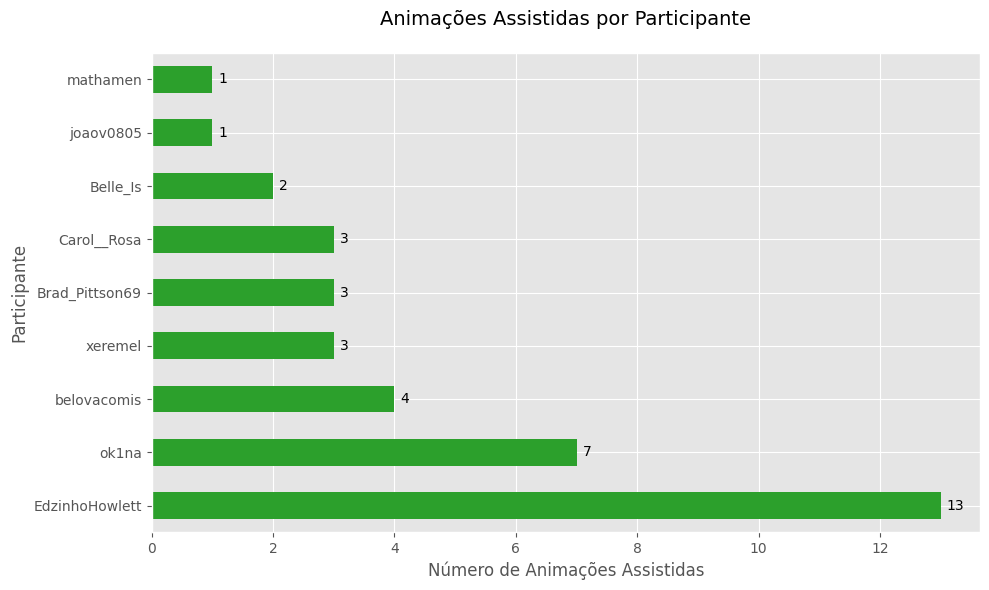


=== RESUMO ESTATÍSTICO (FILTRADO) ===
Total de filmes na lista (filtrada): 190
Filmes de animação: 37 (19.5%)
Filmes que não são animação: 153 (80.5%)

=== ANIMAÇÕES POR PARTICIPANTE (FILTRADO) ===
Assistido por
EdzinhoHowlett    13
ok1na              7
belovacomis        4
xeremel            3
Brad_Pittson69     3
Carol__Rosa        3
Belle_Is           2
joaov0805          1
mathamen           1


In [12]:
## Configurações iniciais
plt.style.use('ggplot')

# Filtrar para excluir os participantes indesejados
participantes_excluidos = ['aNobree', 'Tunim73']
df_filtrado = df[~df['Assistido por'].isin(participantes_excluidos)]

## Análise da proporção de animações (com dados filtrados)
total_filmes = len(df_filtrado)
animacoes = df_filtrado['Flag'].sum()
nao_animacoes = total_filmes - animacoes

# Dados para o gráfico
labels = ['Animação', 'Não-Animação']
sizes = [animacoes, nao_animacoes]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # destaque para animações

# Gráfico de pizza
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 12})
ax1.axis('equal')
plt.title('Proporção de Filmes de Animação (Exceto aNobree e Tunim73)', pad=20, fontsize=14)
plt.tight_layout()

## Análise por participante (com dados filtrados)
animacoes_por_pessoa = df_filtrado[df_filtrado['Flag'] == 1]['Assistido por'].value_counts()

# Gráfico de barras
fig2, ax2 = plt.subplots(figsize=(10, 6))
animacoes_por_pessoa.plot(kind='barh', color='#2ca02c')
ax2.set_title('Animações Assistidas por Participante', pad=20, fontsize=14)
ax2.set_xlabel('Número de Animações Assistidas')
ax2.set_ylabel('Participante')

# Adicionar valores nas barras
for i, v in enumerate(animacoes_por_pessoa):
    ax2.text(v + 0.1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

## Resultados numéricos atualizados
print("\n=== RESUMO ESTATÍSTICO (FILTRADO) ===")
print(f"Total de filmes na lista (filtrada): {total_filmes}")
print(f"Filmes de animação: {animacoes} ({animacoes/total_filmes:.1%})")
print(f"Filmes que não são animação: {nao_animacoes} ({nao_animacoes/total_filmes:.1%})")

print("\n=== ANIMAÇÕES POR PARTICIPANTE (FILTRADO) ===")
print(animacoes_por_pessoa.to_string())